<a href="https://colab.research.google.com/github/wayne0git/financial_lab/blob/main/goodinfo_crawl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GoodInfo Crawling
Ref - https://medium.com/pythonstock/%E5%8F%B0%E7%81%A3%E8%82%A1%E5%B8%82%E8%B3%87%E8%A8%8A%E7%B6%B2-post%E7%88%AC%E8%9F%B2%E5%A4%A7%E5%85%AC%E9%96%8B-%E9%99%84-python%E7%A8%8B%E5%BC%8F%E7%A2%BC-e296238f9ef4

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Parameter

In [3]:
URL = 'https://goodinfo.tw/StockInfo/StockDividendSchedule.asp?STOCK_ID=0050'
HEADER = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36' }

### Download HTML

In [4]:
list_req = requests.post(URL, headers=HEADER)
soup = BeautifulSoup(list_req.content, "html.parser")

### Parser

In [13]:
table = soup.find("table", class_="solid_1_padding_4_1_tbl")

In [52]:
data = []
for row in list(table.children):
    if row.name == 'tr':
        data.append([])
        for col in row.find_all('td'):
            data[-1].append(col.text)

In [56]:
df = pd.DataFrame(data)

In [64]:
df[0] = pd.to_numeric(df[0])
df[4] = pd.to_numeric(df[4])
df[18] = pd.to_numeric(df[18])

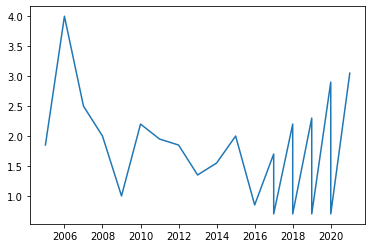

In [65]:
plt.plot(df[0], df[18])